In [1]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
# Step 1: Create a synthetic academic performance dataset
np.random.seed(42)
data = {
'Student_ID': range(1, 101),
'Gender': np.random.choice(['Male', 'Female'], 100),
'Math_Score': np.append(np.random.normal(70, 10, 95), [150, -10, 200, 105, 2]),
'Reading_Score': np.random.normal(65, 12, 100),
'Writing_Score': np.random.normal(68, 15, 100),
'Study_Hours': np.append(np.random.normal(10, 3, 95), [30, 35, 40, 1, 0]),
'Parental_Education_Level': np.random.choice(['High School', 'Bachelor', 'Master'], 100)
}
df = pd.DataFrame(data)
# Introduce some missing values
df.loc[[5, 20, 55], 'Math_Score'] = np.nan
df.loc[[3, 25], 'Parental_Education_Level'] = np.nan
# --- Step 2: Handling Missing Values ---
print("\nMissing Values:\n", df.isnull().sum())
# For numerical: fill missing values with median
df['Math_Score'].fillna(df['Math_Score'].median(), inplace=True)


Missing Values:
 Student_ID                  0
Gender                      0
Math_Score                  3
Reading_Score               0
Writing_Score               0
Study_Hours                 0
Parental_Education_Level    2
dtype: int64



After Handling Missing Values:
 Student_ID                  0
Gender                      0
Math_Score                  0
Reading_Score               0
Writing_Score               0
Study_Hours                 0
Parental_Education_Level    0
dtype: int64


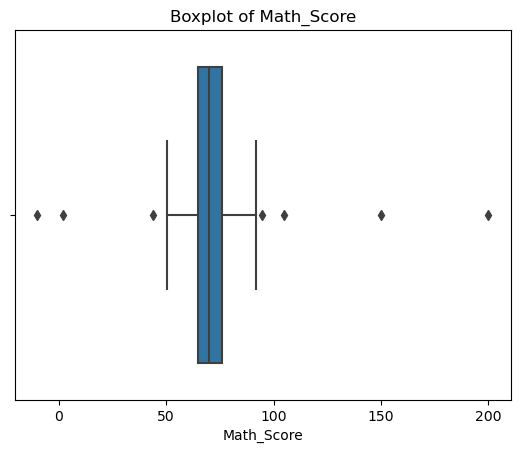

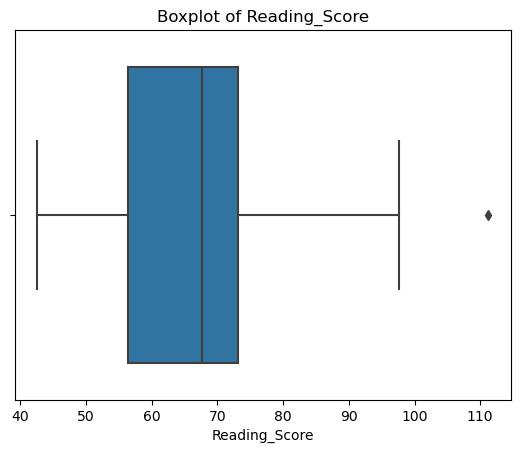

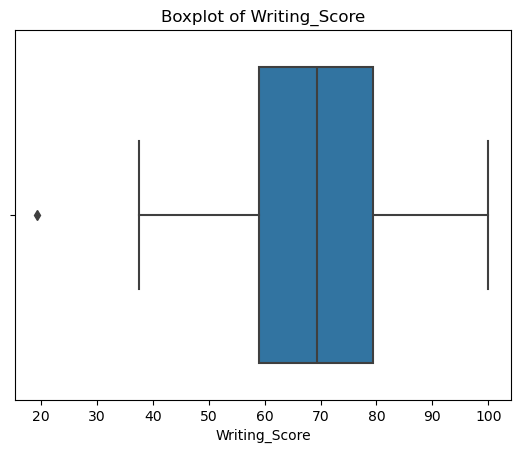

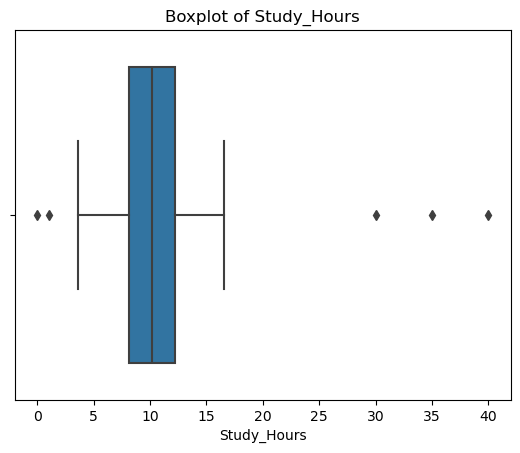


Outliers Detected:
 Math_Score       4
Reading_Score    1
Writing_Score    1
Study_Hours      3
dtype: int64

Shape after removing outliers: (94, 7)

Skewness before transformation: -0.071618891351156


C:\Users\Gayatri Patil\AppData\Local\Temp\ipykernel_14600\3768117050.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outliers['Log_Study_Hours'] = np.log1p(df_no_outliers['Study_Hours'])


In [4]:
# For categorical: fill missing values with mode
df['Parental_Education_Level'].fillna(df['Parental_Education_Level'].mode()[0], inplace=True)
# Verify
print("\nAfter Handling Missing Values:\n", df.isnull().sum())
# --- Step 3: Detecting Outliers in Numeric Variables ---
numeric_cols = ['Math_Score', 'Reading_Score', 'Writing_Score', 'Study_Hours']
# Boxplots for visualization
for col in numeric_cols:
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()
# Use Z-score to detect outliers
z_scores = np.abs(stats.zscore(df[numeric_cols]))
outliers = (z_scores > 3)
print("\nOutliers Detected:\n", outliers.sum())
# Remove outliers (Optional: we can also cap or impute)
df_no_outliers = df[(z_scores < 3).all(axis=1)]
print("\nShape after removing outliers:", df_no_outliers.shape)
# --- Step 4: Data Transformation ---
# Reason: Study_Hours is right-skewed. We'll apply log transformation to normalize it.
print("\nSkewness before transformation:", df_no_outliers['Study_Hours'].skew())
# Add 1 to avoid log(0)
df_no_outliers['Log_Study_Hours'] = np.log1p(df_no_outliers['Study_Hours'])

In [3]:
# Compare distributions
sns.histplot(df_no_outliers['Study_Hours'], kde=True)
plt.title("Original Study Hours Distribution")
plt.show()
sns.histplot(df_no_outliers['Log_Study_Hours'], kde=True)
plt.title("Log-Transformed Study Hours Distribution")
plt.show()
print("\nSkewness after transformation:", df_no_outliers['Log_Study_Hours'].skew())
# Final dataset preview
print("\nTransformed Dataset Head:\n", df_no_outliers.head())

NameError: name 'df_no_outliers' is not defined